In [ ]:
{'classifier': {'C': 5314.615327995967, 'coef0': 0.16977790597930187, 'degree': 3, 'gamma': 9.988527108307264e-05, 'kernel': 'linear', 'shrinking': False, 'tol': 0.00010024236582835611, 'type': 'svc'}, 'data_preprocessing': {'remainder': 'drop', 'type': 'ColumnTransformer'}, 'feature_preprocessing': {'n_components': 13, 'type': 'kernel_pca'}}
 
 Accuracy is 0.734
--------------------
{'classifier': {'bootstrap': True, 'criterion': 'gini', 'max_features': 0.5704866386560512, 'min_samples_leaf': 6, 'min_samples_split': 10, 'type': 'etree'}, 'data_preprocessing': {'type': 'do_noting'}, 'feature_preprocessing': {'threshold': 0.059959231128418444, 'type': 'VarianceThreshold'}}
 
 Accuracy is 0.7550000000000001
--------------------
{'classifier': {'alpha': 0.0793872287623999, 'loss': 'squared_hinge', 'max_iter': 117, 'penalty': 'l1', 'tol': 0.014981518093333248, 'type': 'SGD'}, 'data_preprocessing': {'type': 'SimpleImputer'}, 'feature_preprocessing': {'type': 'do_noting'}}
 
 Accuracy is 0.6619999999999999
--------------------
{'classifier': {'degree': 2, 'gamma': 1.187023485279698e-06, 'kernel': 'laplace', 'n_components': 704, 'type': 'fkceigenpro'}, 'data_preprocessing': {'type': 'minmaxscaler'}, 'feature_preprocessing': {'iterated_power': 7, 'n_components': 11, 'svd_solver': 'full', 'tol': 0.03222142949695317, 'type': 'pca', 'whiten': True}}
 
 Accuracy is 0.736
--------------------
{'classifier': {'criterion': 'entropy', 'max_depth': 568, 'max_features': 'sqrt', 'min_samples_leaf': 18, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.36482956436709707, 'n_estimators': 751, 'oob_score': True, 'type': 'rf'}, 'data_preprocessing': {'type': 'standard_scaler'}, 'feature_preprocessing': {'threshold': 0.26392244224810885, 'type': 'VarianceThreshold'}}
 
 Accuracy is 0.7
100%|██████████| 5/5 [36:26<00:00, 437.37s/trial, best loss: -0.7550000000000001]
Best Accuracy is -0.7550000000000001
 {'classifier': 7, 'data_preprocessing': 5, 'extratreesclassifier__bootstrap': 0, 'extratreesclassifier__criterion': 0, 'extratreesclassifier__max_features': 0.5704866386560512, 'extratreesclassifier__min_samples_leaf': 5, 'extratreesclassifier__min_samples_split': 1, 'feature_preprocessing': 2, 'threshold': 0.059959231128418444} 

{'classifier': {'bootstrap': True, 'criterion': 'gini', 'max_features': 0.5704866386560512, 'min_samples_leaf': 6, 'min_samples_split': 10, 'type': 'etree'}, 'data_preprocessing': {'type': 'do_noting'}, 'feature_preprocessing': {'threshold': 0.059959231128418444, 'type': 'VarianceThreshold'}}
Best score:0.7550000000000001 
 best score id:1 
 Average score[0,5000]:0.7173999999999999
all best scores idices [2]


In [2]:
import pickle
trial = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/results/result_openml_searchspace/5trial_0initial_openml_space.p", "rb"))


In [7]:
len(trial.trials[0]['misc']['vals'])

78

In [7]:
from hyperopt import hp
import openml
import copy
class run_hyperopt(object):
    def __init__(self,dataset_id,task_id):
        self.task_id = task_id
        self.dataset_id = dataset_id

        self.task = openml.tasks.get_task(self.task_id)
        self.dataset = openml.datasets.get_dataset(dataset_id)
        self.X, self.y, self.categorical_indicator, attribute_names = self.dataset.get_data(
            dataset_format='array',
            target=self.dataset.default_target_attribute
        )
        self.copy_X = copy.deepcopy(self.X)
        self.copy_y = copy.deepcopy(self.y)
        self.time_tracker=[]

    def rest_x_y(self):
        self.X = self.copy_X
        self.y = self.copy_y

    def make_search_space(self):
        search_space={
            'data_preprocessing':hp.choice('data_preprocessing',[
                {'type':'Normalizer'},
                {'type':'SimpleImputer'},
                {'type':'ColumnTransformer',
                 'remainder':hp.choice('ColumnTransformer__remainder',["drop", "passthrough"])},
                {'type':'standard_scaler'},
                {'type':'minmaxscaler'},
                {'type':"do_noting"}
            ]),

            'feature_preprocessing':hp.choice('feature_preprocessing',[
                    {'type':'pca',
                    'iterated_power': hp.choice('pca__iterated_power', range(1,10)),
                    'n_components': hp.choice('pca__n_components',range(1,self.X.shape[1])),
                    'svd_solver':hp.choice('pca__svd_solver',['auto','full','randomized']),
                    'tol': hp.uniform('pca__tol',0,0.5),
                    'whiten': hp.choice('pca__whiten', [True, False])},

                    {'type':'kernel_pca',
                     # 'kernel':hp.choice('kernel',["linear","poly","rbf","sigmoid","cosine"]),
                     'n_components':hp.choice('n_components',range(10,self.X.shape[1]))
                     },

                    {   'type':'VarianceThreshold',
                        'threshold':hp.uniform('threshold',0,0.5)
                    },

                    {'type':'do_noting'}

            ]),

            'classifier':hp.choice('classifier',[
                {'type':'rf',
                'criterion': hp.choice('randomforestclassifier__criterion', ["gini", "entropy"]),
                'max_depth': hp.choice('randomforestclassifier__max_depth', range(2,1000)),
                'min_samples_leaf': hp.choice('randomforestclassifier__min_samples_leaf', range(1,20)),
                'min_samples_split': hp.choice('randomforestclassifier__min_samples_split', range(2,20)),
                'min_weight_fraction_leaf': hp.uniform('randomforestclassifier__min_weight_fraction_leaf', 0.0, 0.5),
                'max_features': hp.choice('randomforestclassifier__max_features', ['auto', 'sqrt', 'log2']),
                'n_estimators': hp.choice('randomforestclassifier__n_estimators', range(10,1000)),
                'oob_score': hp.choice('randomforestclassifier__oob_score', [True, False]),
                 },

                {'type':'tree',
                 'criterion': hp.choice('decisiontreeclassifier__criterion', ["gini", "entropy"]),
                 'max_depth':hp.choice('decisiontreeclassifier__max_depth',[0.0009035528566034845,None]),
                 'min_samples_leaf': hp.choice('decisiontreeclassifier__min_samples_leaf', range(1, 9)),
                 'min_samples_split': hp.choice('decisiontreeclassifier__min_samples_split', [9,10]),
                 },

                {'type':'GBC',
                 'criterion': hp.choice('gradientboostingclassifier__criterion', ["friedman_mse", "mse"]),
                 'learning_rate':hp.uniform('gradientboostingclassifier__learning_rate',9.920058705184867e-05,0.00010056450840281946),
                 'max_depth': hp.choice('gradientboostingclassifier__max_depth', range(1,9)),
                 'max_features':hp.uniform('gradientboostingclassifier__max_features', 0.00015525642662705952, 0.9998642646284683),
                 'min_impurity_decrease':hp.uniform('gradientboostingclassifier__min_impurity_decrease',0.00022898940251292466, 0.9996576747926129),
                 'min_samples_leaf':hp.choice('gradientboostingclassifier__min_samples_leaf',range(1,9)),
                 'min_samples_split':hp.choice('gradientboostingclassifier__min_samples_split',[9,10]),
                 'min_weight_fraction_leaf':hp.uniform('gradientboostingclassifier__min_weight_fraction_leaf',8.873194131375772e-05,0.0001884133057376003),
                'n_estimators':hp.choice('gradientboostingclassifier__n_estimators',range(100,995)),
                 'n_iter_no_change':hp.choice('gradientboostingclassifier__n_iter_no_change',range(1,999)),
                 'subsample':hp.uniform('gradientboostingclassifier__subsample',9.236456951389194e-06,0.0002081432615039791),
                 'tol':hp.uniform('gradientboostingclassifier__tol',9.996741607059855e-05,0.0001001692053800057),
                 'validation_fraction':hp.uniform('gradientboostingclassifier__validation_fraction',0.00027270272088730785, 0.99676753787075),
                },

                {'type':'BNB',
                 'fit_prior':hp.choice('bernoullinb__fit_prior',[True,False]),
                 'alpha':hp.uniform('bernoullinb__alpha', 0.010073368015954882, 98.93346969207758),

                },
                {'type':'fkceigenpro',
                'degree':hp.choice('fkceigenpro__degree',range(2,4)),
                 'gamma':hp.uniform('fkceigenpro__gamma', 1e-10,0.0001),
                 'kernel':hp.choice('fkceigenpro__kernel',["laplace", "rbf"]),
                 'n_components':hp.choice("fkceigenpro__n_components",range(500,1000))

                },

                {'type':'svc',
                 'C':hp.uniform("svc__C", 0.01,9979.44679282882),
                 'coef0':hp.uniform('svc__coef0',-0.0001901088806708362, 0.9996939328918386),
                 'degree':hp.choice('svc__degree',range(1,5)),
                 'gamma':hp.uniform('svc__gamma',9.984514749387293e-05,0.00010001864000043732),
                 'kernel':hp.choice('svc__kernel',["linear", "sigmoid"]),
                 'shrinking':hp.choice('svc__shrinking',[True,False]),
                 'tol':hp.uniform('svc__tol',9.990234352037583e-05, 0.00010032523263523512),
                },

                {'type':'KN',
                 'n_neighbors':hp.choice('KN_n_neighbors',range(2,10)),
                 'algorithm':hp.choice('KN_algorithm',['auto', 'ball_tree', 'kd_tree', 'brute'])
                 },

                {'type':'etree',
                 'bootstrap':hp.choice('extratreesclassifier__bootstrap',[True,False]),
                 'criterion': hp.choice('extratreesclassifier__criterion', ["gini", "entropy"]),
                 'max_features': hp.uniform('extratreesclassifier__max_features',
                                            0.00296553169445235, 0.9884684507203433),
                 'min_samples_leaf': hp.choice('extratreesclassifier__min_samples_leaf', range(1, 9)),
                 'min_samples_split': hp.choice('extratreesclassifier__min_samples_split', [9, 10]),
                },
                {'type':'MLP',
                 'activation':hp.choice('mlpclassifier__activation',["identity", "tanh"]),
                 'alpha':hp.uniform('mlpclassifier__alpha', 6.541497552990362e-05,0.00010695575243507994),
                 'batch_size':hp.choice('mlpclassifier__batch_size',['auto',95]),
                 'beta_1':hp.uniform('mlpclassifier__beta_1', 0.00544424784765507, 0.9),
                 'beta_2': hp.uniform('mlpclassifier__beta_2', 0.047423225221743026, 0.999),
                'early_stopping':hp.choice('mlpclassifier__early_stopping',[True,False]),
                 'hidden_layer_sizes':hp.choice('mlpclassifier__hidden_layer_sizes',range(951,1013)),
                 'learning_rate':hp.choice('mlpclassifier__learning_rate',["adaptive", "invscaling"]),
                 'learning_rate_init':hp.uniform('mlpclassifier__learning_rate_init',7.740530907783659e-05,0.00013450694347599834),
                 'max_iter':hp.choice('mlpclassifier__max_iter',range(992,1003)),
                 'momentum':hp.uniform('mlpclassifier__momentum',0.06610188576749942, 0.983051121954481),
                 'n_iter_no_change':hp.choice('mlpclassifier__n_iter_no_change',range(10,987)),
                 'nesterovs_momentum':hp.choice('mlpclassifier__nesterovs_momentum',[True,False]),
                 'power_t':hp.uniform('mlpclassifier__power_t',5.7659652445073064e-05,0.0002094262206310496),
                 'shuffle':hp.choice('mlpclassifier__shuffle',[True,False]),
                 'solver':hp.choice('mlpclassifier__solver',["adam", "sgd"]),
                 'tol':hp.uniform('mlpclassifier__tol',7.072577204620778e-05,0.0001),
                },

                {'type':'SGD',
                 'loss':hp.choice('loss',["log", "modified_huber", "squared_hinge", "perceptron"]),
                 'penalty':hp.choice('penalty',["l1", "l2", "elasticnet"]),
                 'alpha':hp.uniform('alpha',1e-7,1e-1),
                 'max_iter':hp.choice('max_iter',range(5,1000)),
                 'tol':hp.uniform('tol',1e-5, 1e-1)}
            ])

        }
        return search_space
runner = run_hyperopt(31,31)
space = runner.make_search_space()

In [17]:
config= trial.trials[4]
config

{'state': 2,
 'tid': 4,
 'spec': None,
 'result': {'loss': -0.7, 'status': 'ok'},
 'misc': {'tid': 4,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'ColumnTransformer__remainder': [],
   'KN_algorithm': [],
   'KN_n_neighbors': [],
   'alpha': [],
   'bernoullinb__alpha': [],
   'bernoullinb__fit_prior': [],
   'classifier': [4],
   'data_preprocessing': [4],
   'decisiontreeclassifier__criterion': [],
   'decisiontreeclassifier__max_depth': [],
   'decisiontreeclassifier__min_samples_leaf': [],
   'decisiontreeclassifier__min_samples_split': [],
   'extratreesclassifier__bootstrap': [],
   'extratreesclassifier__criterion': [],
   'extratreesclassifier__max_features': [],
   'extratreesclassifier__min_samples_leaf': [],
   'extratreesclassifier__min_samples_split': [],
   'feature_preprocessing': [4],
   'fkceigenpro__degree': [],
   'fkceigenpro__gamma': [],
   'fkceigenpro__kernel': [],
   'fkceigenpro__n_components': [],
   'gradientboostingclassi

In [13]:
from hyperopt import space_eval

space_eval(space,trial.trials)

ERROR in rec_eval
EXCEPTION <class 'AttributeError'> 'NoneType' object has no attribute 'randint'
NODE
0 randint
1   Literal{4}


AttributeError: 'NoneType' object has no attribute 'randint'

In [1]:
import datetime
from datetime import timedelta
import numpy as np
from matplotlib import pyplot as plt

def time_tracker_plot(time_keeper, plot_label, xlabel, ylabel, show_plot=True):

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 8
    plt.plot(time_keeper, label='{}'.format(plot_label))
    plt.grid(True)
    plt.xlabel('{}'.format(xlabel))
    plt.ylabel('{}'.format(ylabel))
    plt.legend(loc=3)
    plt.show()

# 1000 openml trial with 100 iteration

100


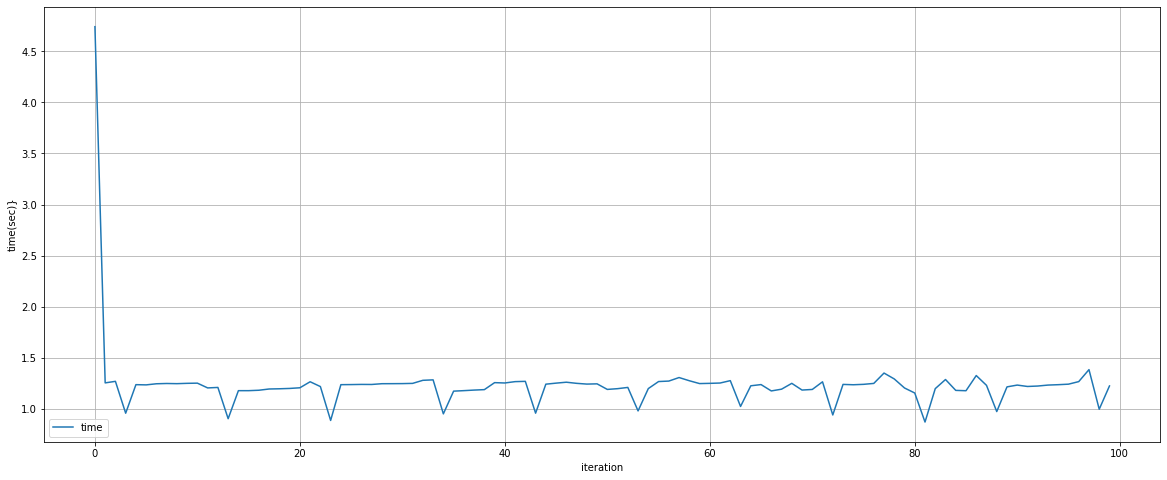

In [5]:
time1=[4.740423, 1.255997, 1.271019, 0.9593, 1.238604, 1.236514, 1.247316, 1.250059, 1.248368, 1.251582, 1.253368, 1.206777, 1.211401, 0.905608, 1.17985, 1.17989, 1.184007, 1.196197, 1.19833, 1.201649, 1.208091, 1.266989, 1.220005, 0.888549, 1.238482, 1.23943, 1.241001, 1.240496, 1.247923, 1.248348, 1.248983, 1.251087, 1.281115, 1.285542, 0.9529, 1.175173, 1.18007, 1.185596, 1.189961, 1.258364, 1.255077, 1.268196, 1.270964, 0.959713, 1.243356, 1.253552, 1.262563, 1.251566, 1.244235, 1.246579, 1.19209, 1.199399, 1.21159, 0.981881, 1.20023, 1.269074, 1.273676, 1.308263, 1.27701, 1.249181, 1.251411, 1.254542, 1.277882, 1.025393, 1.227503, 1.239384, 1.177266, 1.194367, 1.251395, 1.185825, 1.191753, 1.266403, 0.942168, 1.241051, 1.237701, 1.241752, 1.250745, 1.352124, 1.294455, 1.206132, 1.156849, 0.873019, 1.199743, 1.28892, 1.182588, 1.179267, 1.327731, 1.231915, 0.975395, 1.216847, 1.234504, 1.220895, 1.225151, 1.234553, 1.238352, 1.243432, 1.268454, 1.385555, 0.998246, 1.225985]

print(len(time1))
time_tracker_plot(time1,'time', 'iteration', 'time(sec)}', show_plot=True)

######
#{'classifier': {'degree': 2, 'gamma': 1000000000.0, 'kernel': 'laplace', 'n_components': 1000, 'type': 'fkceigenpro'}, 'data_preprocessing': {'type': 'SimpleImputer'}, 'feature_preprocessing': {'type': 'do_noting'}}
#Best score:0.7809999999999999 
#  best score id:998 
#  Average score[1000,1100]:0.6954300000000001 
#  number of all try: 1100 
#  number of fail try:0
# all best scores idices [0]

# empty openml trial with 100 iteration

17


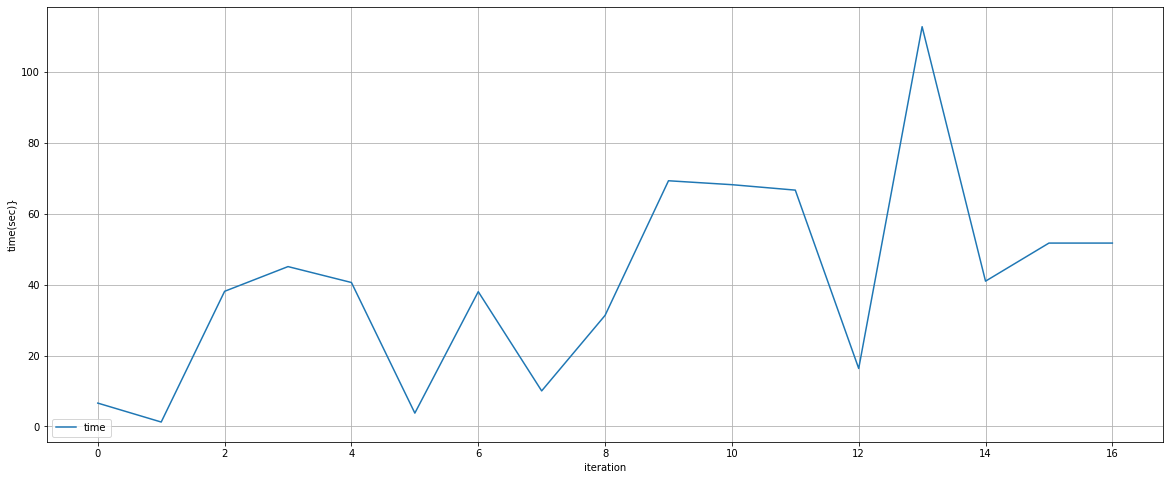

In [2]:
time2 = [6.582667, 1.242463, 38.120653, 45.089029, 40.599705, 3.76179, 38.017996, 10.026749, 31.327996, 69.300988, 68.195375, 66.659183, 16.35026, 112.762439, 40.979077, 51.72217, 51.72217]
print(len(time2))
time_tracker_plot(time2,'time', 'iteration', 'time(sec)}', show_plot=True)


# {'classifier': {'degree': 3, 'gamma': 6.943378540797613e-05, 'kernel': 'laplace', 'n_components': 3440, 'type': 'fkceigenpro'}, 'data_preprocessing': {'type': 'standard_scaler'}, 'feature_preprocessing': {'kernel': 'linear', 'n_components': 15, 'type': 'kernelpca'}}
# Best score:0.765 
#  best score id:90 
#  Average score[0,100]:0.7131666666666667 
#  number of all try: 100 
#  number of fail try:16
# all best scores idices [1, 2, 4, 9, 14, 17, 20, 25, 26, 38, 47, 54, 59, 84, 87, 92]

In [3]:
len([6.828707, 1.317012, 93.991414, 70.427904, 3.838952, 68.124035, 10.421921, 61.323668, 166.481653, 53.088762, 15.960538, 151.541881, 71.008119, 180.595604, 115.916718, 105.608804, 108.146807, 290.34462, 6.968543, 2.958591, 99.398428, 55.981155, 1.791467, 72.155837, 149.927525, 37.133657, 89.339189, 160.730388, 94.629898, 138.420178, 77.34203, 322.747299, 25.521757, 10.586714, 8.910526, 69.468435, 95.020352, 1.388229, 11.837288, 22.70367, 8.170221, 1.228069, 38.068189, 61.241829, 1.594411, 13.36299, 71.367657, 19.504315, 4.811086, 72.57155, 27.202546, 61.509163, 60.615657, 8.507784, 8.379696, 34.428099, 11.854564, 63.459101, 58.808048, 1.752761, 5.139244, 82.34458, 10.759915, 37.443991, 46.635471, 12.302728, 196.82948, 95.333625, 78.128968, 67.979205, 47.339454, 60.481457, 1.370679, 107.235792, 11.57203, 10.007143, 87.627226, 8.530032, 3.183401, 144.64866, 28.384099, 1.529461, 19.223224, 30.618896, 10.709481, 8.75978, 70.203872, 23.887527, 1.50024, 72.097013, 9.671839, 32.009985, 70.294693, 126.264013, 1.787413, 281.478683, 101.432824, 75.741727, 1.761661, 114.923148, 56.382347, 3.579131, 61.488583, 21.927934, 84.753473, 1.857473, 12.467969, 199.972967, 88.173279, 43.553439, 3.04751, 84.426003, 5.481467, 33.12507, 12.223331, 53.078262, 102.509183, 1.311978, 94.836486, 43.871912, 11.516154, 95.500651, 3.139332, 78.105482, 61.33628, 323.772997, 1.213631, 119.836954, 1.386178, 102.790646, 9.109731, 89.882435, 100.813708, 17.667567, 50.550853, 7.860144, 91.731843, 156.274102, 131.81954, 17.410562, 70.582763, 103.222499, 1.379656, 64.651132, 8.589983, 104.046831, 9.254363, 79.274332, 53.338435, 3.083313, 119.396857, 18.070981, 18.070981]
)

153